# Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import json
import random
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils import data
from torchvision import transforms

from MSCOCO import COCO

# Dataset Interface

In [2]:
class MSCOCOInterface(data.Dataset):
    
    # constructor
    def __init__(self, imgs_path, captions_path):
        """
        Constructor of MS COCO Interface for get imgs and caps as tensors.
        :param root (str): location of the data on the disk
        :param imgs_path (str): location of img folder
        :param captions_path (str): location to the captions folder.
        """
        self.captions_path = captions_path
        # below returns list of all image POSIX file paths and ignores files/folders
        # starting with '.' which ignores .ipynb_checkpoint folders
        self.imgs = sorted(Path(imgs_path).glob('[!.]*'))
        self.coco = COCO(self.imgs, self.captions_path)
        
    
    # image transforms
    def img_transforms(self, img):
        transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
        
        return transformer(img)
        
    
    # load image as Image then transform it to tensor
    def load_img(self, idx):
        img = self.coco.get_img(idx)
        img = self.img_transforms(img)
        return img
    
    
    def get_captions(self, img_file_name):
        captions = self.coco.get_captions(img_file_name)
        return self.coco.get_captions(img_file_name)
    
    def display_img_with_captions(self, idx):
        img_file_name = self.imgs[idx]
        img = self.coco.get_img(idx)
        caps = self.get_captions(img_file_name)
        plt.imshow(img)
        plt.show()
        for cap in caps:
            print(cap)
        
    # return the length of the dataset
    def __len__(self):
        return len(self.imgs)
    
    # get an item from the dataset
    def __getitem__(self, idx):
        return idx

In [3]:
###### SUGGESTED CHANGE OF DIRECTORY STRUCTURE
# Github page for COCO API suggests puting data into coco/images and coco/annotations, so could do that?
# The API is pretty straightforward and helps with visualisation etc
######
root = Path('Datasets/coco')
# root = Path('../../Datasets/MS COCO')
imgs_path = root/'images'/'train2017'
captions_path = root/'annotations'/'captions_train2017.json'

interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path
}

In [4]:
coco_interface = MSCOCOInterface(**interface_params)

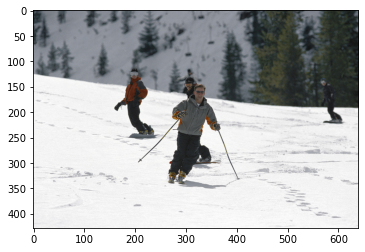

A man riding skis down a snow covered sky slope.
people skiing and snowboarding down a snow covered mountain.
A man is coming down a snowy hill on skis.
A man riding his skis in the snow at the ski slope
A man is skiing in the snow while others are snowboarding.


In [14]:
random_idx = random.randint(0, len(coco_interface.imgs))
coco_interface.display_img_with_captions(random_idx)